## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from random import random

# Part 1. Linear regression model

## Load regression data

In [2]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

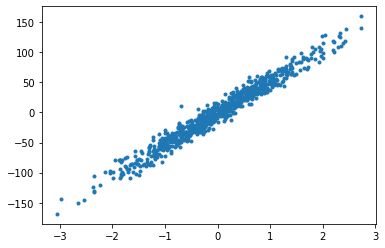

In [3]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [4]:
# mean square error: E = 1/n ∑ ((ax+b) - y)^2
# gradient descent of a: ∂E/∂a = 1/n ∑ 2x(ax + b - y)
# gradient descent of b: ∂E/∂b = 1/n ∑ 2(ax + b - y)

linear_regression_loss = []
def linear_regression_train(x, y, lr=0.1, ep=100):
    a, b = np.random.normal(), np.random.normal()
    for _ in range(ep):
        a_gradient, b_gradient = 0, 0
        for i in range(len(x)):
            a_gradient += 2 * x[i] * (a * x[i] + b - y[i])
            b_gradient += 2 * (a * x[i] + b - y[i])
        a -= lr * a_gradient / len(x)
        b -= lr * b_gradient / len(x)
        linear_regression_loss.append(mean_square_error(y, a * x + b))
    return a, b

def mean_square_error(truth, pred):
    error = 0
    for i in range(len(truth)):
        error += (pred[i] - truth[i]) ** 2
    return error / len(truth)

def linear_regression(x_train, y_train, x_test):
    weight, intercept = linear_regression_train(x_train, y_train)
    print("Weight:", weight[0])
    print("Intercept:", intercept[0])
    return weight * x_test + intercept


## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

Weight: 52.74354039801786
Intercept: -0.33375890939333613
Mean Square Error: 110.43819236217556


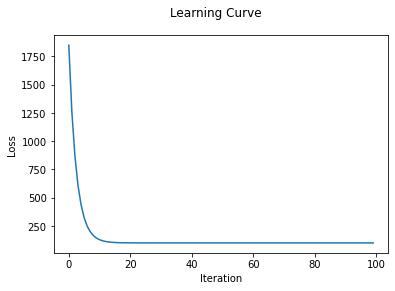

In [5]:
y_pred = linear_regression(x_train, y_train, x_test)
print("Mean Square Error:", mean_square_error(y_test, y_pred)[0])

plt.plot(linear_regression_loss)
plt.suptitle("Learning Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# Part 2. Logistic regreesion model

## Load classification data

In [6]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

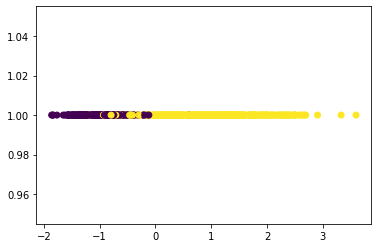

In [7]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

Weight: 4.2002744308136055
Intercept: 1.30169881702314
Cross Entropy Error: 45.38122864007148


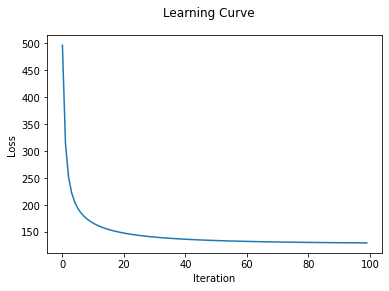

In [9]:
# E = - ∑ t_n ln(y_n) + (1 - t_n) ln(1 - y_n)
# gradient descent of a: ∂E/∂a = (σ(ax + b) - t_n) * x
# gradient descent of b: ∂E/∂b = (σ(ax + b) - t_n)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def cross_entropy(truth, pred):
    error = 0
    for i in range(len(truth)):
        error += truth[i] * np.log(sigmoid(pred[i])) + (1 - truth[i]) * np.log(1 - sigmoid(pred[i]))
    return -error

logistic_regression_loss = []
def logistic_regression_train(x, y, lr=0.002, ep=100):
    a, b = np.random.normal(), np.random.normal()
    for _ in range(ep):
        a_gradient, b_gradient = 0, 0
        for i in range(len(x)):
            a_gradient += (sigmoid(a * x[i] + b) - y[i]) * x[i] 
            b_gradient += (sigmoid(a * x[i] + b) - y[i])
        a -= lr * a_gradient
        b -= lr * b_gradient
        logistic_regression_loss.append(cross_entropy(y, a * x + b))
    return a, b

def logistic_regression(x_train, y_train, x_test):
    weight, intercept = logistic_regression_train(x_train, y_train)
    print("Weight:", weight[0])
    print("Intercept:", intercept[0])
    return weight * x_test + intercept


y_pred = logistic_regression(x_train, y_train, x_test)
print("Cross Entropy Error:", cross_entropy(y_test, y_pred)[0])

plt.plot(logistic_regression_loss)
plt.suptitle("Learning Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()